In [2]:
# SVM_Kernel_Comparison.py
# Exploring the impact of different kernel functions in SVM for classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Generate a synthetic non-linear dataset (two interleaving circles)
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize feature values to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0, random_state=42)  # Polynomial kernel
    else:
        model = SVC(kernel=kernel, C=1.0, random_state=42)  # Linear & RBF kernels
    
    model.fit(X_train_scaled, y_train)
    models[kernel] = model

# Evaluate model performance
for kernel, clf in models.items():
    y_pred = clf.predict(X_test_scaled)
    print(f"\n=== SVM with {kernel.upper()} Kernel ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best Accuracy from Grid Search: {:.3f}".format(grid_search.best_score_))




=== SVM with LINEAR Kernel ===
Confusion Matrix:
 [[31 44]
 [18 57]]
Classification Report:
               precision    recall  f1-score   support

           0      0.633     0.413     0.500        75
           1      0.564     0.760     0.648        75

    accuracy                          0.587       150
   macro avg      0.599     0.587     0.574       150
weighted avg      0.599     0.587     0.574       150


=== SVM with POLY Kernel ===
Confusion Matrix:
 [[10 65]
 [ 1 74]]
Classification Report:
               precision    recall  f1-score   support

           0      0.909     0.133     0.233        75
           1      0.532     0.987     0.692        75

    accuracy                          0.560       150
   macro avg      0.721     0.560     0.462       150
weighted avg      0.721     0.560     0.462       150


=== SVM with RBF Kernel ===
Confusion Matrix:
 [[70  5]
 [13 62]]
Classification Report:
               precision    recall  f1-score   support

           0  

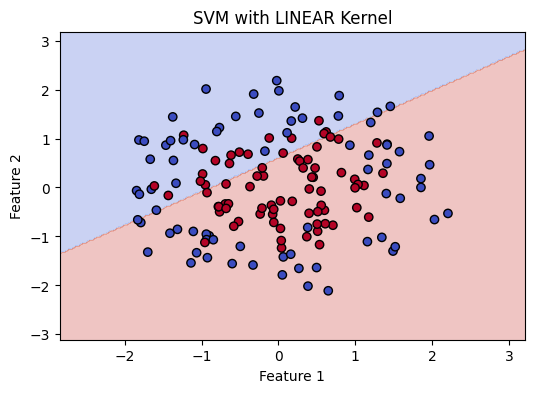

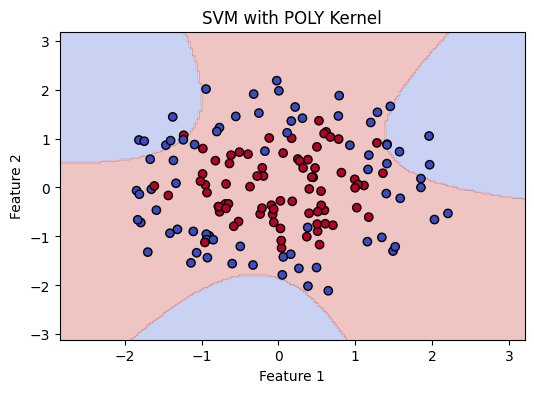

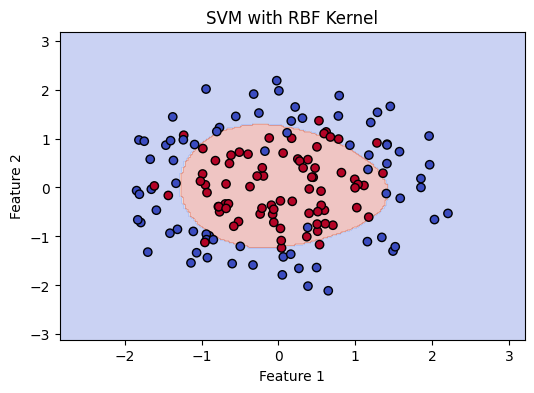

In [3]:
# Function to visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision boundaries for each kernel
for kernel, clf in models.items():
    plot_decision_boundary(clf, X_test_scaled, y_test, f"SVM with {kernel.upper()} Kernel")
